<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [284]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import norm

In [2]:
!gdown --id 1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn
To: /content/dst-3.0_16_1_hh_database.csv
100% 455M/455M [00:04<00:00, 95.5MB/s]


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [226]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [227]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [230]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [231]:
df['Образование'] = df['Образование и ВУЗ'].str.lower().str.split().apply(lambda x: ' '.join(x[:2])).str.replace('высшее образование', 'высшее')

In [232]:
df['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее образование      559
Name: Образование, dtype: int64

In [233]:
df.drop('Образование и ВУЗ', axis = 1, inplace = True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [234]:
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])
df['Возраст'] = df['Пол, возраст'].str.split(' , ').apply(lambda x: x[1]).str.split().apply(lambda x: x[0]).astype(int)

In [235]:
df.drop('Пол, возраст', axis = 1, inplace = True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [236]:
def raw_exp2exp(raw_exp):
  if not type(raw_exp)==str:
    return None
  year_match = re.search('\d{1,3} год', raw_exp)
  if year_match is None:
    years = 0
  else:
    years = int(year_match.group(0).split()[0])

  month_match = re.search('\d{1,3} месяц', raw_exp)
  if month_match is None:
    months = 0
  else:
    months = int(month_match.group(0).split()[0])

  res_months_num = years*12+months

  return res_months_num

In [237]:
df['Опыт работы'] = df['Опыт работы'].replace({'Не указано':None})
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(raw_exp2exp)

In [238]:
df.drop('Опыт работы', axis = 1, inplace = True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [239]:
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']


df['Город'] = df['Город, переезд, командировки'].str.split(' , ').apply(lambda x: x[0])

cities = df['Город'].unique()
cities_map = {}
for city in cities:
  if city in million_cities:
    cities_map[city] = 'город-миллионник'
  else:
    cities_map[city] = 'другие'

cities_map['Москва'] = ['Москва']
cities_map['Санкт-Петербург'] = ['Санкт-Петербург']

df['Город'] = df['Город'].replace(cities_map)

In [240]:
def business_trip(x):
  try:
    text = [i for i in x if 'команд' in i][0]
    return not 'не готов' in text

  except:
    return None
df['Готовность к командировкам'] = df['Город, переезд, командировки'].str.split(' , ').apply(business_trip)

In [241]:
def relocation(x):
  try:
    text = [i for i in x if 'перее' in i][0]
    return not 'не готов' in text

  except:
    return None
df['Готовность к переезду'] = df['Город, переезд, командировки'].str.split(' , ').apply(relocation)

In [242]:
df.drop('Город, переезд, командировки', axis = 1, inplace = True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [243]:
mlb = MultiLabelBinarizer()

busy_table = pd.DataFrame(mlb.fit_transform(df['Занятость'].str.split(', ')),
                   columns=mlb.classes_)

schedule_table = pd.DataFrame(mlb.fit_transform(df['График'].str.split(', ')),
                   columns=mlb.classes_)
df = pd.concat([df, busy_table, schedule_table], axis = 1)

In [244]:
df.drop(['Занятость', 'График'], axis = 1, inplace = True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [245]:
df['value'] = df['ЗП'].str.split().apply(lambda x: x[0]).astype(float)
df['currency'] = df['ЗП'].str.split().apply(lambda x: x[1])
df['date'] = pd.to_datetime(pd.to_datetime(df['Обновление резюме']).dt.date)

df['currency'] = df['currency'].replace({
    'бел.руб.':'BYN',
    'грн.':'UAH',
    'сум':'UZS'
})

In [246]:
currencies = pd.read_csv('ExchangeRates.csv')
currencies['date'] = pd.to_datetime(currencies['date'], dayfirst = True)

df = pd.merge(df, currencies[['date', 'currency', 'close']], on = ['date', 'currency'], how = 'left')
df['close'] = df['close'].fillna(1)
df['ЗП (руб)'] = df['value']*df['close']

In [247]:
df.drop(['value', 'close', 'currency', 'date', 'ЗП'], axis = 1, inplace = True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

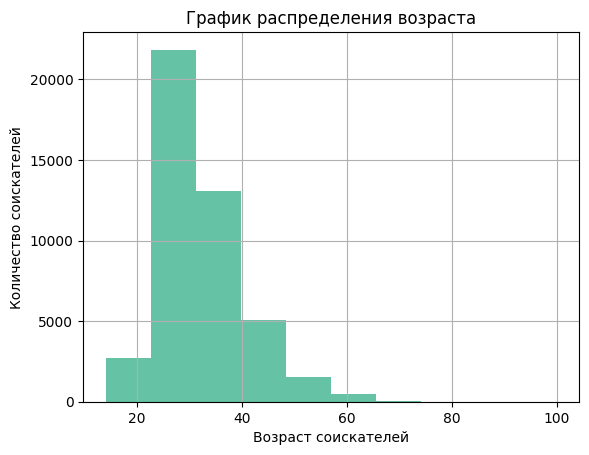

In [248]:
df['Возраст'].hist()
plt.title('График распределения возраста')
plt.ylabel('Количество соискателей')
plt.xlabel('Возраст соискателей')
plt.show()

<Axes: >

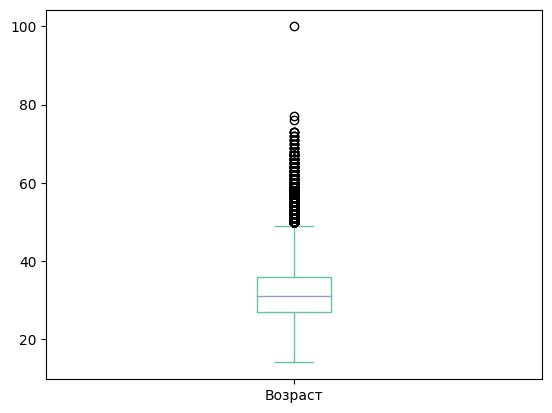

In [249]:
df['Возраст'].plot(kind = 'box')

In [250]:
df['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

In [251]:
df['Возраст'].quantile(0.1), df['Возраст'].quantile(0.9)

(24.0, 43.0)

In [252]:
df['Возраст'].describe()

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Наиболее частое значиение возраста соискателей - 30 лет  
Основная доля (~80%) соискателей с 24 до 37 лет  
Предельные значения 14 и 100  
Аномалий замечено не было


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [253]:
view_col = 'Опыт работы (месяц)'

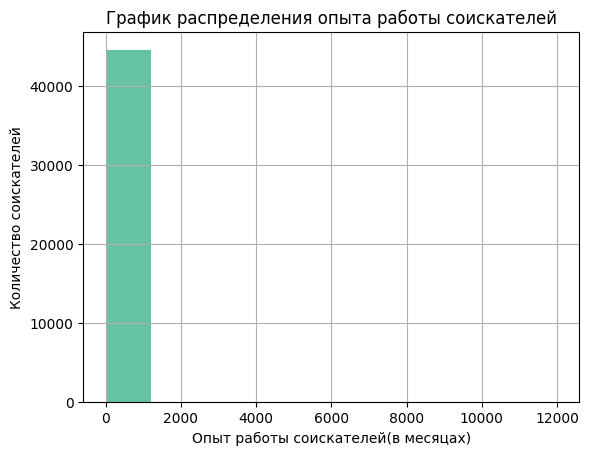

In [254]:
df[view_col].hist()
plt.title('График распределения опыта работы соискателей')
plt.ylabel('Количество соискателей')
plt.xlabel('Опыт работы соискателей(в месяцах)')
plt.show()

<Axes: >

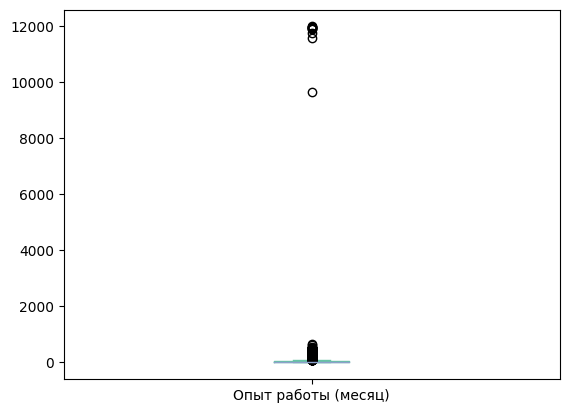

In [255]:
df[view_col].plot(kind = 'box')

In [256]:
df[view_col].mode()

0    20.0
Name: Опыт работы (месяц), dtype: float64

In [257]:
df[view_col].quantile(0.1), df[view_col].quantile(0.9)

(8.0, 55.0)

In [258]:
df[view_col].describe()

count    44574.000000
mean        41.855701
std        191.604094
min          0.000000
25%         16.000000
50%         27.000000
75%         43.000000
max      11992.000000
Name: Опыт работы (месяц), dtype: float64

Наиболее частое значиение опыта соискателей - 20 месяцев  
Основная доля (\~80%) соискателей обладают стажем от 8 до 55 месяцев  
Предельные значения 0 и 11992
Были замечены и удалены аномально большие значения параметра


In [259]:
df = df[df[view_col]<840]

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [260]:
view_col = 'ЗП (руб)'

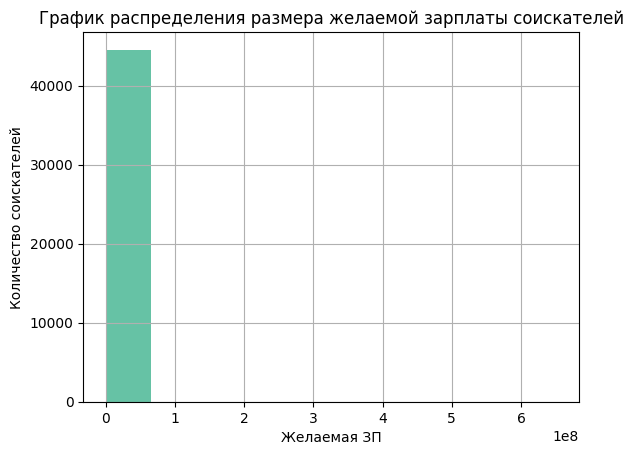

In [261]:
df[view_col].hist()
plt.title('График распределения размера желаемой зарплаты соискателей')
plt.ylabel('Количество соискателей')
plt.xlabel('Желаемая ЗП')
plt.show()

In [262]:
# IMPORTANT: исключаем аномальные резюме для дальнейшего анализа

max_salary_trashold = 1000000
df = df[df[view_col]<max_salary_trashold]
min_salary_trashold = 1000
df = df[df[view_col]>min_salary_trashold]

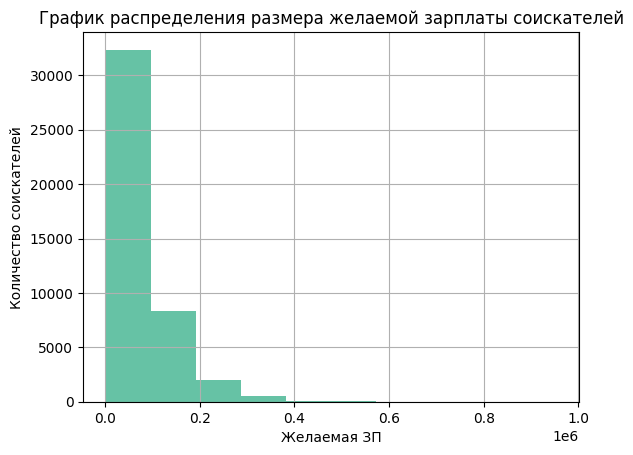

In [263]:
df[view_col].hist()
plt.title('График распределения размера желаемой зарплаты соискателей')
plt.ylabel('Количество соискателей')
plt.xlabel('Желаемая ЗП')
plt.show()

<Axes: >

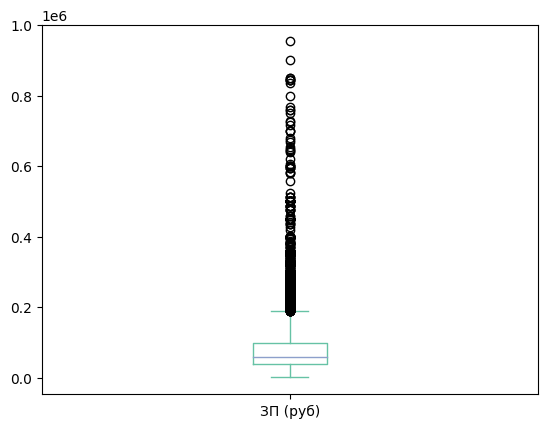

In [264]:
df[view_col].plot(kind = 'box')

In [265]:
df[view_col].quantile(0.1), df[view_col].quantile(0.9)

(28000.0, 150000.0)

In [266]:
df[view_col].describe()

count     43325.000000
mean      77413.757576
std       62942.440294
min        1200.000000
25%       40000.000000
50%       60000.000000
75%      100000.000000
max      953872.000000
Name: ЗП (руб), dtype: float64

Без очистки предельное значение желаемой ЗП - очень велико \~600 миллионов
Минимальное предельное значение 63 рубля, что тоже веротяно является не корректным  
Основная доля (\~80%) соискателей ожидает зарплату 28-150тыс рублей    
Что каксается аномалий, то по сути к ним относится большое количество зарплат больших миллиона и некоторое количество зарплат меньше 1000. Допускаю, что зарплаты в промежутке от 1000 до прожиточного минимума, могут быть не аномалиями, а работой на полставки или меньше.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Text(0.5, 1.0, 'График зависимости медианной желаемой заработной платы от уровня образования')

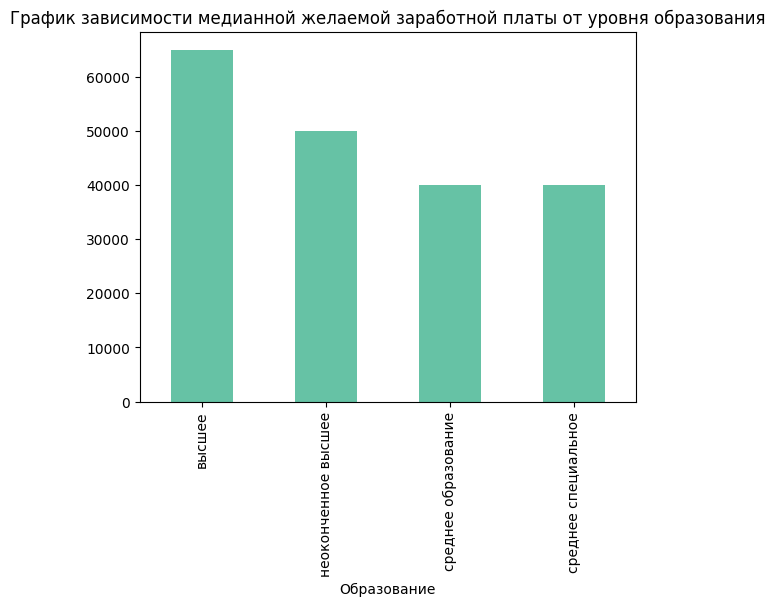

In [204]:
df.groupby('Образование')['ЗП (руб)'].median().plot(kind = 'bar')
plt.title('График зависимости медианной желаемой заработной платы от уровня образования')

Наименьшие ЗП наблюдаются для групп со средним образованием  
Наибольшая зарплата наблюдается для группы высшее  
Вероятно признак важен, так как в медианах есть сильны различия(\~50%), но окончательный вывод о важности можно сделать только на основе анализа распределений запрплат для разных уровней образования(ниже в доп графиках). Плюс важный момент в том, насколько репрезентативен датасет реальному распределению соискателей.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

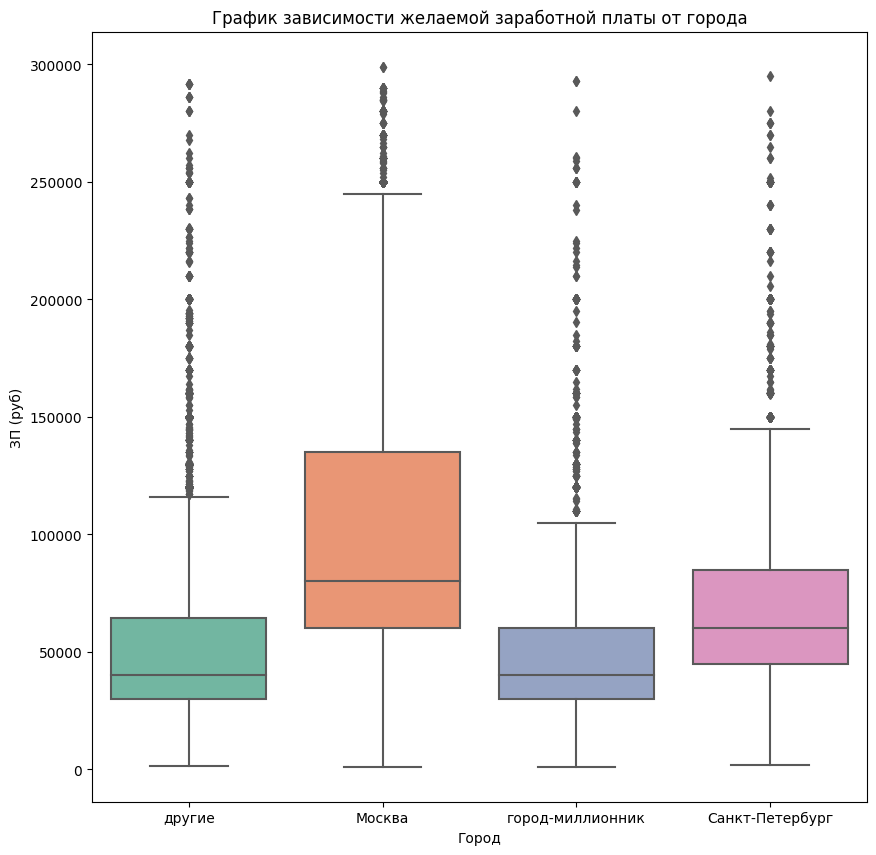

In [205]:
trashold = df[view_col].quantile(0.99)
plt.figure(figsize=(10, 10))
sns.boxplot(x='Город', y="ЗП (руб)", data=df[df[view_col]<trashold])
plt.title('График зависимости желаемой заработной платы от города')
plt.show()

Видим четкую зависимость, которая отражает реальную статистику запрпалт. В Москве все ключевые показатели (медиана, 1й, 3й квартили) выше, чем где бы то ни было, на втором месте СПП. А "другие" города и города-миллионники, по этим же показателям находятся ниже всех. Интересное наблюдение, что они при этом не значительно отличаются друг от друга.
Для определения ожидаемого уровня ЗП признак город однозначно важен


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [206]:
df4plot = df[['Готовность к переезду', 'Готовность к командировкам', 'ЗП (руб)']].copy()
df4plot['Готовность к командировкам'] = df4plot['Готовность к командировкам'].replace({False:'Не готов к командировкам', True:'Готов к командировкам'})
df4plot['Готовность к переезду'] = df4plot['Готовность к переезду'].replace({False:'Не готов к переезду', True:'Готов к переезду'})

Text(0.5, 1.0, 'График зависимости медианы желаемой заработной платы от готовности к переезду и к команжировкам')

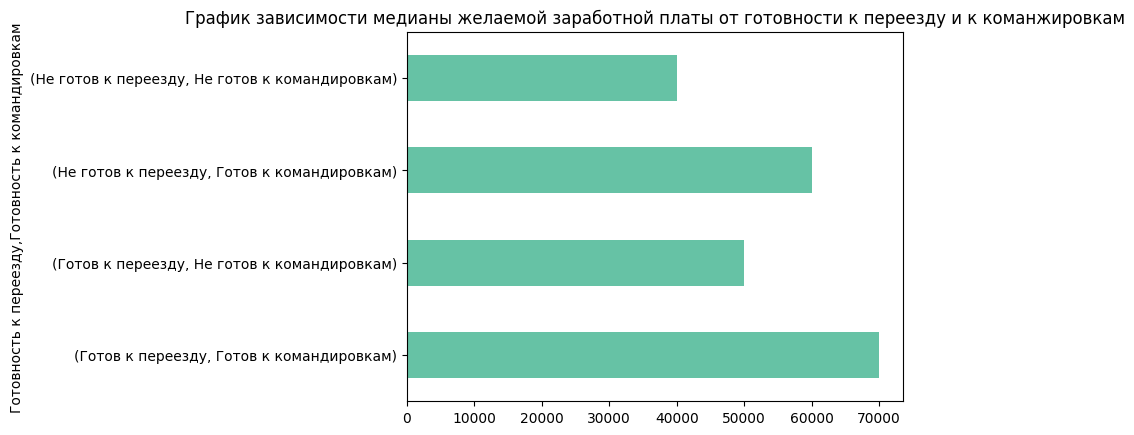

In [207]:
df4plot.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().plot(kind='barh')
plt.title('График зависимости медианы желаемой заработной платы от готовности к переезду и к команжировкам')


Наибольшая медиана ЗП в первую очередь у людей готовых к командировкам. При том, у готовых еще и к переезду она выше.    
Наименее низкая медиана желаемой ЗП у людей не готовых к переезду и к командировкам, что огично.  

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [267]:
df4plot = df.groupby(['Возраст', 'Образование'])['ЗП (руб)'].median().reset_index()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'style'
  cset = contour_func(


Text(0.5, 1.0, 'График зависимости медианы желаемой заработной платы от уровня образования и возраста')

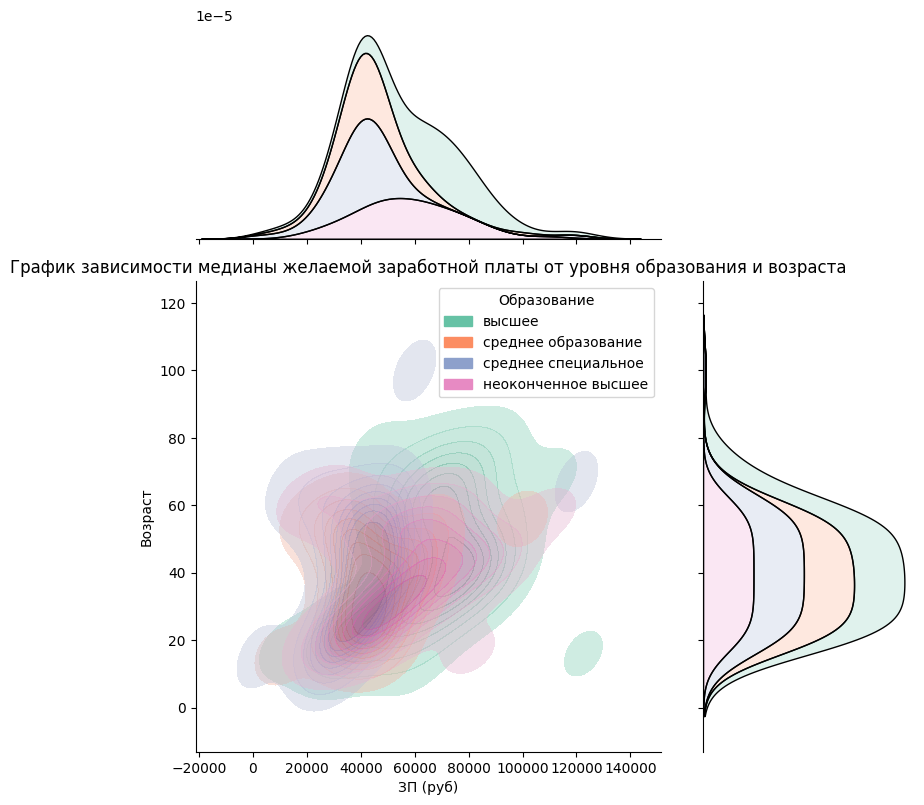

In [268]:

sns.set_palette(sns.color_palette("Set2"))

jointplot = sns.jointplot(
    data=df4plot,
    x='ЗП (руб)',
    y='Возраст',
    hue='Образование',
    height=8, kind="kde",
    style="choice",
                  ratio=2, marginal_kws={'multiple': 'stack', "color":"r", "alpha":.2}, shade=True, shade_lowest=False, alpha=.4,
)
plt.title('График зависимости медианы желаемой заработной платы от уровня образования и возраста')


Во всх группах образования видим тенденцию к росту зп с возрастом

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

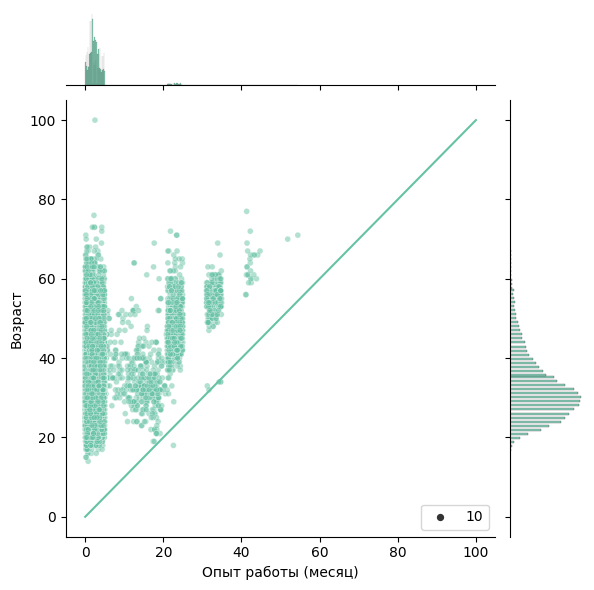

In [269]:
sns.jointplot(x=df["Опыт работы (месяц)"]/12, y=df["Возраст"],size=10, alpha=0.5)
plt.plot([0,100], [0,100])
plt.show()

In [270]:
df[(df['Опыт работы (месяц)']/12)+8>df['Возраст']]


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
1658,Программист Python,Виста,Программист Python,22.04.2019 16:29,Не указано,высшее,М,19,209.0,Санкт-Петербург,...,1,0,0,1,0,0,1,0,1,50000.0
3280,Full-Stack JavaScript Developer,[f]-PR,Intern,25.04.2019 11:12,Не указано,неоконченное высшее,М,21,230.0,Санкт-Петербург,...,1,0,0,0,0,0,1,0,0,35000.0
4535,Технический специалист,а,а,11.04.2019 10:46,Не указано,среднее специальное,Ж,18,271.0,другие,...,1,1,0,1,0,0,0,1,1,15000.0
8112,Менеджер по продажам,АТЦ Москва,Менеджер по продажам автомобилей с пробегом,26.04.2019 16:56,Не указано,неоконченное высшее,М,34,416.0,Москва,...,1,0,0,0,0,0,1,0,0,70000.0
8764,Специалист по IT,"АНО ""Исполнительная дирекция XXIX Всемирной зи...",Менеджер аккредитации,25.04.2019 23:34,Имеется собственный автомобиль,высшее,М,27,231.0,город-миллионник,...,1,0,0,0,0,0,1,0,0,45000.0
9070,Инженер связи,Ростелеком,Специалист по обслуживанию базовых станций,10.04.2019 17:17,Не указано,высшее,М,25,219.0,Москва,...,1,0,0,0,0,0,1,0,0,80000.0
9747,Руководитель проекта,"АНО ""Дирекция Красноярск 2019""",Начальник отдела объектового контроля Департам...,10.04.2019 09:19,Имеется собственный автомобиль,среднее специальное,Ж,27,232.0,город-миллионник,...,1,0,0,0,0,0,1,0,0,55000.0
11427,Креативный аналитик,Чеченский Государственный Университет,Инженер,25.04.2019 12:17,Не указано,высшее,М,22,202.0,другие,...,1,0,0,0,0,0,1,0,0,30000.0
12241,"Менеджер проектов, event специалист","Школа бизнеса «Синергия""",Координатор департамента продаж (event),25.04.2019 15:12,Имеется собственный автомобиль,высшее,Ж,25,209.0,другие,...,1,0,0,0,0,0,1,0,0,100000.0
12778,Специалист по IT,Связной,Менеджер по продажам финансовых продуктов,25.04.2019 10:27,Не указано,высшее,Ж,24,224.0,другие,...,1,0,0,0,0,1,1,1,1,30000.0


В данных присутсвтуют аномальные записи. Исключим их

In [271]:
df = df[(df['Опыт работы (месяц)']/12)+8<df['Возраст']]

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


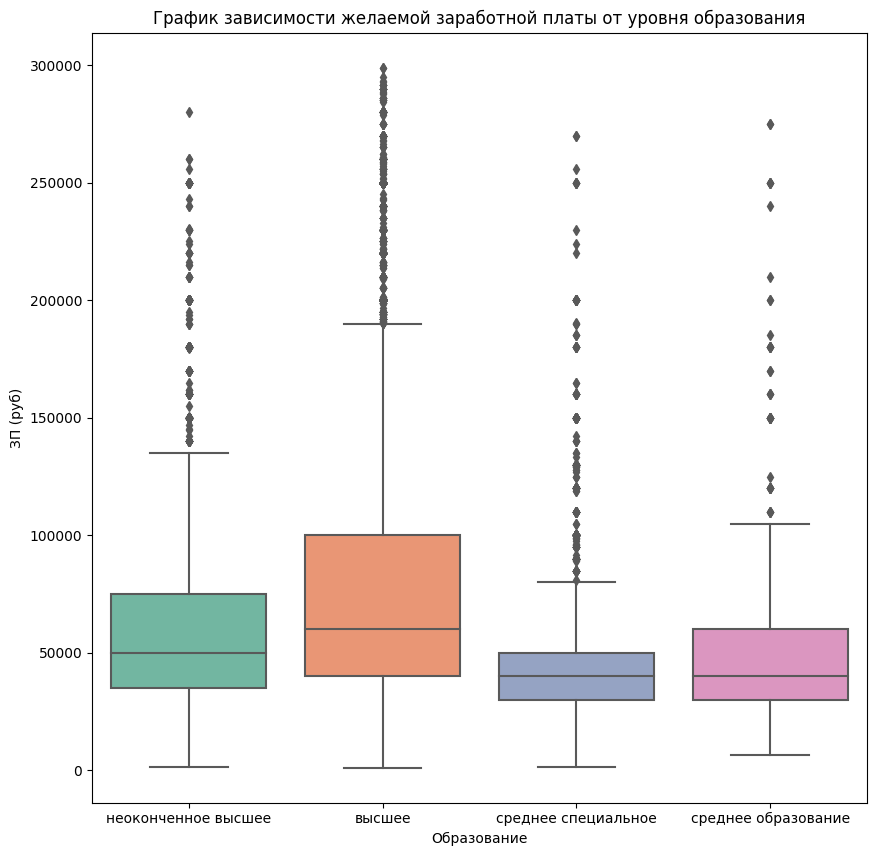

In [272]:
trashold = df[view_col].quantile(0.99)
plt.figure(figsize=(10, 10))
sns.boxplot(x='Образование', y="ЗП (руб)", data=df[df[view_col]<trashold])
plt.title('График зависимости желаемой заработной платы от уровня образования')
plt.show()

На данный момент мы видим более обширную картину по зваисиомсти уровня зп от уровня образования.  
Из графика можно сделать вывод, что важность признака однозначна, особеннно в рамках резделения на неоконченное+высшее и специальные, они сильно разняться друг с другом.  
Что касается различий внутри описанных групп, то например, отсносительно средних можно сказать, что хоть и 1й квартиль и медиана  у них очень близки, но просто среднее образование иметь статистически выгоднее, так как в нем выше 3й квартиль.  
Если рассмотреть вторую группу высшее+неоконченное высшее, но у неоконченного высшего примерно на 10 тысяч ниже медиана и 1й квартиль, и 3й квартиль сильно ниже.

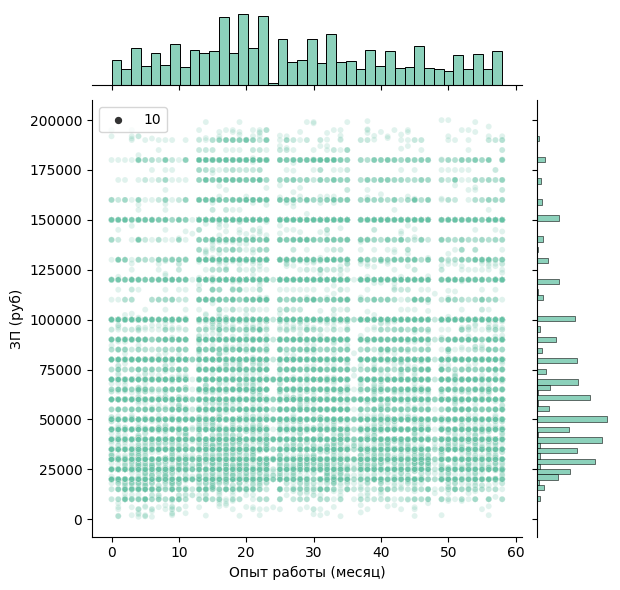

In [273]:
salary_trashold = df["ЗП (руб)"].quantile(0.95)
df4jointplot = df[df["ЗП (руб)"]<salary_trashold]

exp_trashold = df4jointplot["Опыт работы (месяц)"].quantile(0.95)
df4jointplot = df4jointplot[df4jointplot["Опыт работы (месяц)"]<exp_trashold]

sns.jointplot(x=df4jointplot["Опыт работы (месяц)"], y=df4jointplot["ЗП (руб)"],size=10, alpha=0.2)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


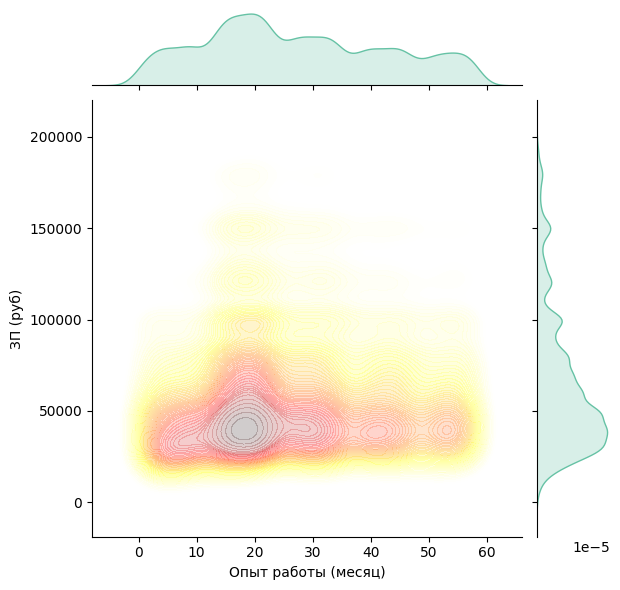

In [274]:
sns.jointplot(x=df4jointplot["Опыт работы (месяц)"], y=df4jointplot["ЗП (руб)"],size=10, alpha=0.2, kind='kde', cmap='hot_r', n_levels=60, fill=True)
plt.show()

На графике зависимости наиболее распространенных зарплат(желаемых) и месяцов опыта, мы видим заметный тренд на повышения зп, с объемом опыта, что логично, но для более детального анализа, следовало бы взять конкретные специальности и области, и смотреть в данные о них, так как в данном джойн плоте все профессие находятся в перемешку.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [275]:
df = df[~df.duplicated()]

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43145 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        43145 non-null  object 
 1   Последнее/нынешнее место работы  43144 non-null  object 
 2   Последняя/нынешняя должность     43143 non-null  object 
 3   Обновление резюме                43145 non-null  object 
 4   Авто                             43145 non-null  object 
 5   Образование                      43145 non-null  object 
 6   Пол                              43145 non-null  object 
 7   Возраст                          43145 non-null  int64  
 8   Опыт работы (месяц)              43145 non-null  float64
 9   Город                            43145 non-null  object 
 10  Готовность к командировкам       43072 non-null  object 
 11  Готовность к переезду            43145 non-null  bool   
 12  волонтерство      

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [279]:
df = df[df['Последнее/нынешнее место работы'].notnull()]
df = df[df['Последняя/нынешняя должность'].notnull()]
df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median())
df['Готовность к командировкам'] = df['Готовность к командировкам'].fillna(df['Готовность к командировкам'].mode())


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [280]:
max_salary_trashold = 1000000
df = df[df['ЗП (руб)']<max_salary_trashold]
min_salary_trashold = 1000
df = df[df['ЗП (руб)']>min_salary_trashold]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [281]:
df = df[(df['Опыт работы (месяц)']/12)+8<df['Возраст']]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

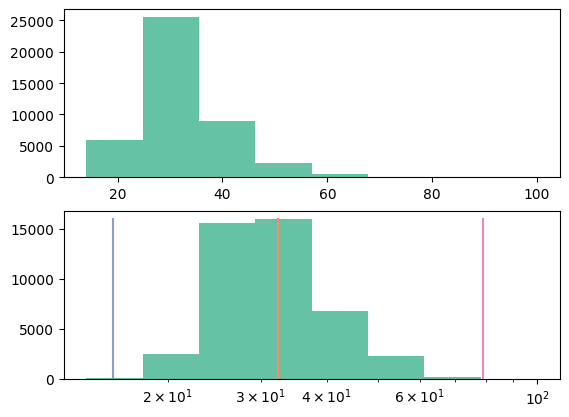

In [323]:
x = df['Возраст']
x_log = np.log10(x)
SD = x_log.std()
right_3_sd = 10**(x_log.mean()+4*x_log.std())
left_3_sd = 10**(x_log.mean()-3*x_log.std())

# histogram on linear scale
plt.subplot(211)
hist, bins, _ = plt.hist(x, bins=8)

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(x, bins=logbins)
plt.plot([x.mean()]*2, [0,16000])
plt.plot([left_3_sd]*2, [0,16000])
plt.plot([right_3_sd]*2, [0,16000])
plt.xscale('log')

In [324]:
df = df[df['Возраст']<left_3_sd]
df = df[df['Возраст']>right_3_sd]

Правосторонне асимметричное